## Project 3 - Collab and Compete - Multi Agent Tennis environment

In [1]:
#Imports
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from datetime import datetime as dt
import matplotlib.pyplot as plt
from maddpg import Pair
%matplotlib inline

In [2]:
#Loading environment
env = UnityEnvironment(file_name='Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
#Reading
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]

In [4]:
#Init Pair of Agents
pair = Pair(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=2)

In [5]:
#DDPG from ddpg-pendulum
def maddpg(n_episodes=5000, max_t=1000, print_every=100):
    target_score = 0.5     #Desired score
    scores_window = deque(maxlen=100)
    scores = []
    cont = True
    for i_episode in range(1, n_episodes+1):
        #resetting with train_mode true
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        episode_scores = np.zeros(num_agents)
        for t in range(max_t):
            pair.reset_agents()
            actions = pair.act(states)
            
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            pair.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            episode_scores += np.array(rewards)
            if np.any(dones):
                break 
        
        score = episode_scores.max()
        scores_window.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=target_score and cont:
            cont = False    
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(pair.checkpoint()[0], f'checkpoint_actor.pth')
            torch.save(pair.checkpoint()[1], f'checkpoint_critic.pth')
            
    return scores

In [6]:
#Training
scores = maddpg()

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.01
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.01
Episode 800	Average Score: 0.03
Episode 900	Average Score: 0.03
Episode 1000	Average Score: 0.02
Episode 1100	Average Score: 0.07
Episode 1200	Average Score: 0.16
Episode 1300	Average Score: 0.38
Episode 1325	Average Score: 0.52
Environment solved in 1225 episodes!	Average Score: 0.52
Episode 1400	Average Score: 0.47
Episode 1500	Average Score: 0.26
Episode 1600	Average Score: 0.19
Episode 1700	Average Score: 0.16
Episode 1800	Average Score: 0.17
Episode 1900	Average Score: 0.18
Episode 2000	Average Score: 0.22
Episode 2100	Average Score: 0.24
Episode 2200	Average Score: 0.13
Episode 2300	Average Score: 0.27
Episode 2400	Average Score: 0.19
Episode 2500	Average Score: 0.14
Episode 2600	Average Score: 0.17
Episode 2700	Average Score: 0.16
Episode 2800	Average Score: 

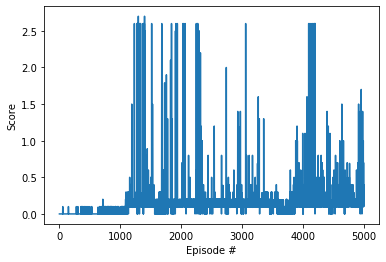

In [8]:
#Plotting the score vs count of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [9]:
#close
env.close()
